# SparkDev AI Hurricane Trajectory Prediction

In this project, we'll be using neural networks to predict the trajectory paths of hurricanes in South Florida. We will be using the Hurricane Database dataset from Unisys Weather. Here we will preprocess the data, then train a recurrent neural network on some of the samples. At the end, we'll get to see our neural network's hurricane trajectory path predictions.

## Get the Data

[Here's the link containing the entire dataset.](http://weather.unisys.com/hurricane/atlantic/) So far, we're using only the years 2000 to 2009 and is saved on our repo as '2000-2009-data.csv'.

In [18]:
import pandas as pd

data = pd.read_csv('2000-2009-data.csv', names=["Year", "Month", "Day", "Hour", "HurricaneNum", "Name", "Lat", "Long", "WindSpeed", "Pressure"])
data.head() #Preview first 5 rows of data

,Year,Month,Day,Hour,HurricaneNum,Name,Lat,Long,WindSpeed,Pressure
0,2000,6,7,18,1,NOTNAMED,21.0,-93.0,25,0
1,2000,6,8,0,1,NOTNAMED,20.9,-92.8,25,0
2,2000,6,8,6,1,NOTNAMED,20.7,-93.1,25,0
3,2000,6,8,12,1,NOTNAMED,20.8,-93.5,25,0
4,2000,6,23,0,2,NOTNAMED,9.5,-19.8,25,0


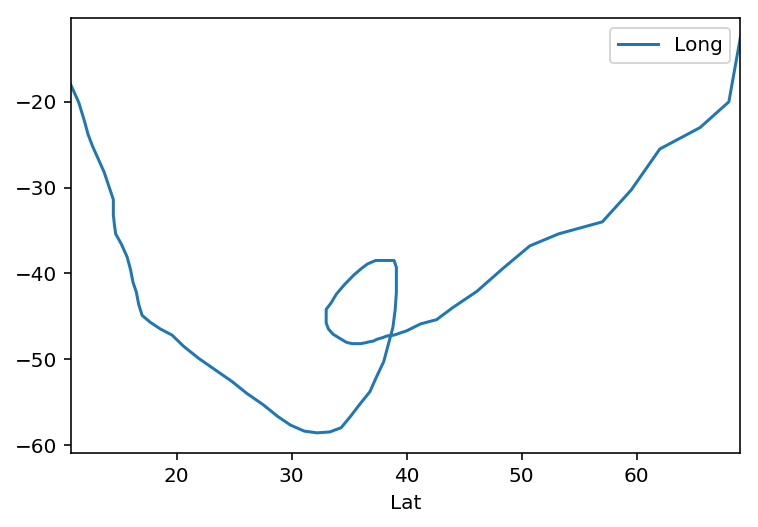

In [19]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

data[16:102].plot(x='Lat', y='Long') # Trajectory path of hurricane Alberto

## Data Preprocessing 

In this section, we will modify the data to create "uniform and comparable" points for each of the hurricanes. This technique is called Dynamic Time-Warping (DTW). 

### Why are we doing this? 

From our dataset, we have hurricanes recorded as a set of ordered sequences of points. In order to properly analyze this trajectory data, we have to be able to compare the similarity between these trajectories and this cannot occur with how the data is currently collected. For example, let's say we have 2 hurricanes, hurricane A and B. Hurricane A only lasted for 2 days, while hurricane B lasted for 10 days. In order to identify similar portions between these trajectories, they must be the same length in terms of time. So, we must use this DTW technique to transform hurricane A into a hurricane that lasted 10 days. Now our neural network can receive all hurricane inputs as "equals" and can properly learn the behaviors of hurricane trajectories. 

### References 
- [Approximating Dynamic Time Warping and Edit Distance for a Pair of Point Sequences](https://users.cs.duke.edu/~jwpan/papers/socg16.pdf)
- [FastDTW: Toward Accurate Dynamic Time Warping in Linear Time and Space](http://cs.fit.edu/~pkc/papers/tdm04.pdf)

In [17]:
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

hurricaneA = data.loc[4:15,"Lat":"Long"]
hurricaneB = data.loc[16:102,"Lat":"Long"]

a = np.array(hurricaneA)
b = np.array(hurricaneB)

distance, path = fastdtw(a, b, dist=euclidean)
print(distance)

2188.245028851854


## Train the Network

In [3]:
import tensorflow as tf